In [1]:
#STUDENT NAME: SHRUTHI
#STUDENT ID: 801218392
#HOMEWORK 1 QUESTION 3

In [2]:
## Please note that for this question I used AutoGrad and SGD Optimizer

%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
import pandas as pd 
import math
torch.set_printoptions(edgeitems=2, linewidth=75)

In [3]:
# Obtaining the housing data as given in the sample code
housing = pd.DataFrame(pd.read_csv("C:/Users/Shruthi/Documents/HWs/RTML/hw1/images/Housing.csv")) 
#housing.head() 
housing
housing.shape 

(545, 13)

In [4]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
Newtrain = housing[num_vars] 
Newtrain

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000
...,...,...,...,...,...,...
540,3000,2,1,1,2,1820000
541,2400,3,1,1,0,1767150
542,3620,2,1,1,0,1750000
543,2910,3,1,1,0,1750000


In [5]:
#Randomly shuffling the rows, to give the model a more random data
t_an = Newtrain.to_numpy()
np.random.shuffle(t_an)
t_an.shape
row=t_an.shape[0]
column=t_an.shape[1]
print(row)
print(column)
column

545
6


6

In [6]:
# Normalizing the data as per the formula in the textbook 
## P.S. all the operations of the normalization of the dataset are done when the matrix is a numpy array
#Standard Deviations of each column
std0=np.sqrt(np.var(t_an[:,0], axis=0))
std1=np.sqrt(np.var(t_an[:,1], axis=0))
std2=np.sqrt(np.var(t_an[:,2], axis=0))
std3=np.sqrt(np.var(t_an[:,3], axis=0))
std4=np.sqrt(np.var(t_an[:,4], axis=0))
std5=np.sqrt(np.var(t_an[:,5], axis=0))
#Mean of each column
mean0=np.mean(t_an[:,0])
mean1=np.mean(t_an[:,1])
mean2=np.mean(t_an[:,2])
mean3=np.mean(t_an[:,3])
mean4=np.mean(t_an[:,4])
mean5=np.mean(t_an[:,5])
#Iterating to get the normalized values in the dataset
for r in range (row):
    t_an[r, 0]=(t_an[r, 0]-mean0)/std0
    t_an[r, 1]=(t_an[r, 1]-mean1)/std1
    t_an[r, 2]=(t_an[r, 2]-mean2)/std2
    t_an[r, 3]=(t_an[r, 3]-mean3)/std3
    t_an[r, 4]=(t_an[r, 4]-mean4)/std4
    t_an[r, 5]=(t_an[r, 5]-mean5)/std5

print(std0, std1, std2, std3, std4, std5)
print(mean0, mean1, mean2, mean3, mean4, mean5)
print(t_an)

2168.149153321305 0.7373864268686331 0.5020084231005495 0.8666962328697991 0.8607949418951395 1868722.828131208
5150.54128440367 2.9651376146788992 1.2862385321100918 1.8055045871559634 0.6935779816513762 4766729.247706422
[[ 1  0  1  2  1  2]
 [ 0  4  1  0  0  0]
 [ 0  1  0  0  0  0]
 ...
 [ 0 -1  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0 -1  0  0  0 -1]]


In [7]:
#Splitting the dataset in order to get the target data- the price. Here it is t_c
#To get the target data, the price data, I took a transpose of the original dataset array
t_a1, t_a2, t_a3, t_a4, t_a5, t_cn = t_an.T
t_cn=torch.tensor(t_cn)
t_c=t_cn

In [8]:
#Combining the remaing again to get the feature dataset
t_t = (t_a1, t_a2, t_a3, t_a4, t_a5)
t_ua = np.vstack(t_t)
t_ua.shape
t_u = torch.tensor(t_ua)

In [9]:
#Defining the model as given in the question
def model(t_u, w1, w2, w3, w4, w5, b):
    W1= w1 * t_u[0, :] 
    W2= w2 * t_u[1, :]
    W3= w3 * t_u[2, :]
    W4= w4 * t_u[3, :]
    W5= w5 * t_u[4, :]
    s= W1 + W2 + W3 + W4 + W5
    un = (s+b)
    return un

In [10]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [11]:
#Defining the parameters as a 1x6 tensor for the values of w1, w2, w3, w4, w5 and bias respectively and 
# declaring the SGD optimizer
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [12]:
#Definig t_p, the predicted price data
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

optimizer.step()
params

tensor([ 9.9999e-01,  9.9999e-01,  9.9998e-01,  9.9999e-01,  9.9999e-01,
        -1.5046e-05], requires_grad=True)

In [13]:
#Definig the training loop
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params) # <1>
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward() # <2>
        optimizer.step()

        if epoch==1 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {loss.item():.4f},")
            
    return params

In [14]:
                                    #*** LEARNING RATE= 1E-1 ***

In [15]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    t_u = t_u, # <1> 
    t_c = t_c)

Epoch 1, Training loss 2.8404,
Epoch 500, Training loss 0.3234,
Epoch 1000, Training loss 0.3234,
Epoch 1500, Training loss 0.3234,
Epoch 2000, Training loss 0.3234,
Epoch 2500, Training loss 0.3234,
Epoch 3000, Training loss 0.3234,
Epoch 3500, Training loss 0.3234,
Epoch 4000, Training loss 0.3234,
Epoch 4500, Training loss 0.3234,
Epoch 5000, Training loss 0.3234,


tensor([ 0.2324,  0.0914,  0.3550,  0.2194,  0.2352, -0.1388],
       requires_grad=True)

In [16]:
                                #*** LEARNING RATE= 1E-2 ***

In [17]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    t_u = t_u, # <1> 
    t_c = t_c)

Epoch 1, Training loss 2.8404,
Epoch 500, Training loss 0.3244,
Epoch 1000, Training loss 0.3234,
Epoch 1500, Training loss 0.3234,
Epoch 2000, Training loss 0.3234,
Epoch 2500, Training loss 0.3234,
Epoch 3000, Training loss 0.3234,
Epoch 3500, Training loss 0.3234,
Epoch 4000, Training loss 0.3234,
Epoch 4500, Training loss 0.3234,
Epoch 5000, Training loss 0.3234,


tensor([ 0.2324,  0.0914,  0.3550,  0.2194,  0.2352, -0.1388],
       requires_grad=True)

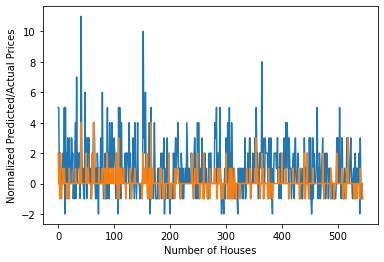

In [18]:
# In my code, i got the least training and validation loss for the learning rate 1e-2. 
#Hence, I visualized the t_p values obtained from here. The graph has the house index on the x axis and the predicted (blue)
# /actual (orange) values of the y-axis. 

import matplotlib.pyplot as plt
torch.Tensor.ndim = property(lambda self: len(self.shape))  # Fix it
#plt.ylabel("Predicted House Values")
#plt.xlabel("Actual House Values")
x = list(range(0, t_u.size(1)))
plt.xlabel("Number of Houses")
plt.ylabel("Normalized Predicted/Actual Prices")
plt.plot(x, t_p.detach().numpy())
plt.plot(x, t_c)
#plt.plot(t_p.detach().numpy(), t_c)  # Works now
plt.show()

In [19]:
                                         #*** LEARNING RATE= 1E-3 ***

In [20]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-3
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    t_u = t_u, # <1> 
    t_c = t_c)

Epoch 1, Training loss 2.8404,
Epoch 500, Training loss 0.7624,
Epoch 1000, Training loss 0.4466,
Epoch 1500, Training loss 0.3694,
Epoch 2000, Training loss 0.3441,
Epoch 2500, Training loss 0.3342,
Epoch 3000, Training loss 0.3296,
Epoch 3500, Training loss 0.3271,
Epoch 4000, Training loss 0.3258,
Epoch 4500, Training loss 0.3249,
Epoch 5000, Training loss 0.3244,


tensor([ 0.2245,  0.0841,  0.3438,  0.2464,  0.2936, -0.1599],
       requires_grad=True)

In [21]:
                                 #*** LEARNING RATE= 1E-4 ***

In [22]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    t_u = t_u, # <1> 
    t_c = t_c)

Epoch 1, Training loss 2.8404,
Epoch 500, Training loss 2.3835,
Epoch 1000, Training loss 2.0186,
Epoch 1500, Training loss 1.7264,
Epoch 2000, Training loss 1.4915,
Epoch 2500, Training loss 1.3016,
Epoch 3000, Training loss 1.1473,
Epoch 3500, Training loss 1.0214,
Epoch 4000, Training loss 0.9180,
Epoch 4500, Training loss 0.8326,
Epoch 5000, Training loss 0.7617,


tensor([ 0.6095,  0.5023,  0.5540,  0.6415,  0.6837, -0.3408],
       requires_grad=True)